In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
drivers = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\drivers.csv')
driver_standings = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\driver_standings.csv')
races =  pd.read_csv('D:\\Data_Science_Documents\\Formula_one\data_files\\races.csv')
teams = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructors.csv')

Drivers Data Cleaning

In [3]:
drivers.drop(columns=['url', 'dob', 'nationality'], inplace=True)

Races Data Cleaning

In [4]:
races.drop(columns=['url', 'fp1_date', 'fp1_time', 'fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)

All 2022 Races

In [5]:
races = races[races['year'] == 2022]

Driver standings for only the races in 2022

In [6]:
driver_standings =  driver_standings[driver_standings['raceId'].isin(races['raceId'])]

replacing driver IDs with the names

In [7]:
driver_ids = driver_standings['driverId'].unique()

In [8]:
driver_ids

array([842, 830, 815, 807, 849, 846, 817, 848, 840, 854, 855,   4, 852,
       839, 822, 844, 832,   1, 847, 825,  20], dtype=int64)

In [9]:
driver_names = drivers[drivers['driverId'].isin(driver_ids)].set_index('driverId')['code'].to_dict()

In [10]:
driver_standings['Name'] = driver_standings['driverId'].replace(driver_names)

Adding the race Name based on race id

In [11]:
race_names = races.set_index('raceId')['name'].to_dict()

In [12]:
driver_standings['Race Name'] = driver_standings['raceId'].replace(race_names)

In [13]:
driver_standings.reset_index(inplace=True)

In [14]:
driver_standings.sort_values(by='raceId')

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
19,33434,71380,1074,825,10.0,5,5,0,MAG,Bahrain Grand Prix
18,33433,71379,1074,847,12.0,4,4,0,RUS,Bahrain Grand Prix
17,33432,71378,1074,1,15.0,3,3,0,HAM,Bahrain Grand Prix
16,33431,71377,1074,832,18.0,2,2,0,SAI,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
272,33687,71565,1087,832,171.0,4,4,1,SAI,Belgian Grand Prix
271,33686,71564,1087,844,186.0,3,3,3,LEC,Belgian Grand Prix
290,33705,71583,1087,842,18.0,14,14,0,GAS,Belgian Grand Prix
280,33695,71573,1087,855,5.0,17,17,0,ZHO,Belgian Grand Prix


In [15]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [16]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
287,33702,71580,1087,807,0.0,21,21,0,HUL,Belgian Grand Prix
288,33703,71581,1087,815,191.0,2,2,1,PER,Belgian Grand Prix
289,33704,71582,1087,830,284.0,1,1,9,VER,Belgian Grand Prix
290,33705,71583,1087,842,18.0,14,14,0,GAS,Belgian Grand Prix


In [17]:
driver_standings['Team'] = driver_standings['Name'].replace(driver_teams)

In [18]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix,gray
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix,darkblue
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix,darkblue
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix,darkgreen
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix,dodgerblue
...,...,...,...,...,...,...,...,...,...,...,...
287,33702,71580,1087,807,0.0,21,21,0,HUL,Belgian Grand Prix,darkgreen
288,33703,71581,1087,815,191.0,2,2,1,PER,Belgian Grand Prix,darkblue
289,33704,71582,1087,830,284.0,1,1,9,VER,Belgian Grand Prix,darkblue
290,33705,71583,1087,842,18.0,14,14,0,GAS,Belgian Grand Prix,gray


In [19]:
grouped = driver_standings.groupby(['Team','raceId'])

In [20]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


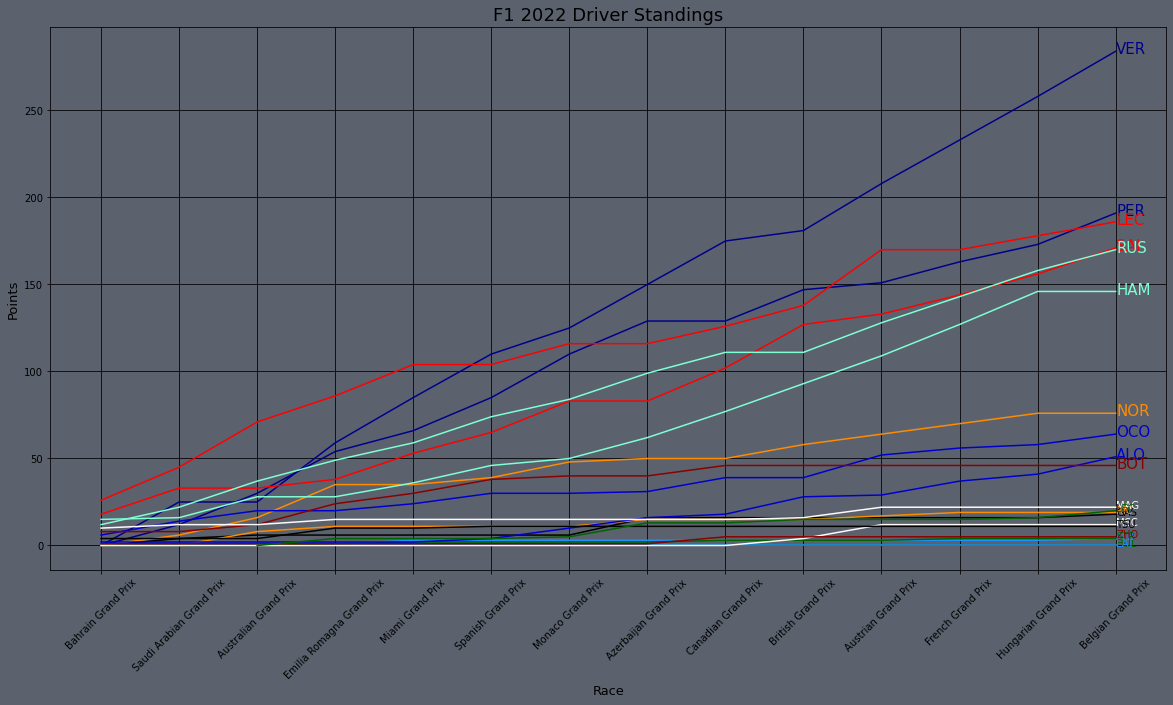

In [21]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkblue', 'darkblue', 'darkgreen', 'dodgerblue', 'darkorange','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','mediumblue','black','mediumblue','darkred','red','red','aquamarine','aquamarine','snow','darkgreen']

ax = sns.lineplot(driver_standings['Race Name'], driver_standings['points'],palette=colors,hue=driver_standings['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)
plt.legend().set_visible(False)
x = 0
for line, name in zip(ax.lines, driver_standings['Name']):
    y = line.get_ydata()[-1]
    if y <= 45:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=10, va="center")
    else:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=15, va="center")
    x+=1
    if x >= 21:
        break



plt.grid(color ='black')
plt.show()

In [52]:
driverids = driver_standings[(driver_standings['raceId'] == 1087) & (driver_standings['points'] <= 35)]['driverId']

In [53]:
driver_standings2 = driver_standings[driver_standings['driverId'].isin(driverids)]

In [54]:
driver_standings2[driver_standings2['raceId'] == 1087]

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
275,33690,71568,1087,825,22.0,11,11,0,MAG,Belgian Grand Prix,snow
278,33693,71571,1087,852,11.0,16,16,0,TSU,Belgian Grand Prix,gray
280,33695,71573,1087,855,5.0,17,17,0,ZHO,Belgian Grand Prix,darkred
281,33696,71574,1087,854,12.0,15,15,0,MSC,Belgian Grand Prix,snow
282,33697,71575,1087,840,4.0,19,19,0,STR,Belgian Grand Prix,darkgreen
283,33698,71576,1087,848,4.0,18,18,0,ALB,Belgian Grand Prix,dodgerblue
284,33699,71577,1087,817,19.0,13,13,0,RIC,Belgian Grand Prix,darkorange
286,33701,71579,1087,849,0.0,20,20,0,LAT,Belgian Grand Prix,dodgerblue
287,33702,71580,1087,807,0.0,21,21,0,HUL,Belgian Grand Prix,darkgreen
290,33705,71583,1087,842,18.0,14,14,0,GAS,Belgian Grand Prix,gray


In [55]:
driver_standings2['Name'].unique()


array(['GAS', 'HUL', 'LAT', 'RIC', 'ALB', 'STR', 'MSC', 'ZHO', 'TSU',
       'MAG', 'VET'], dtype=object)

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


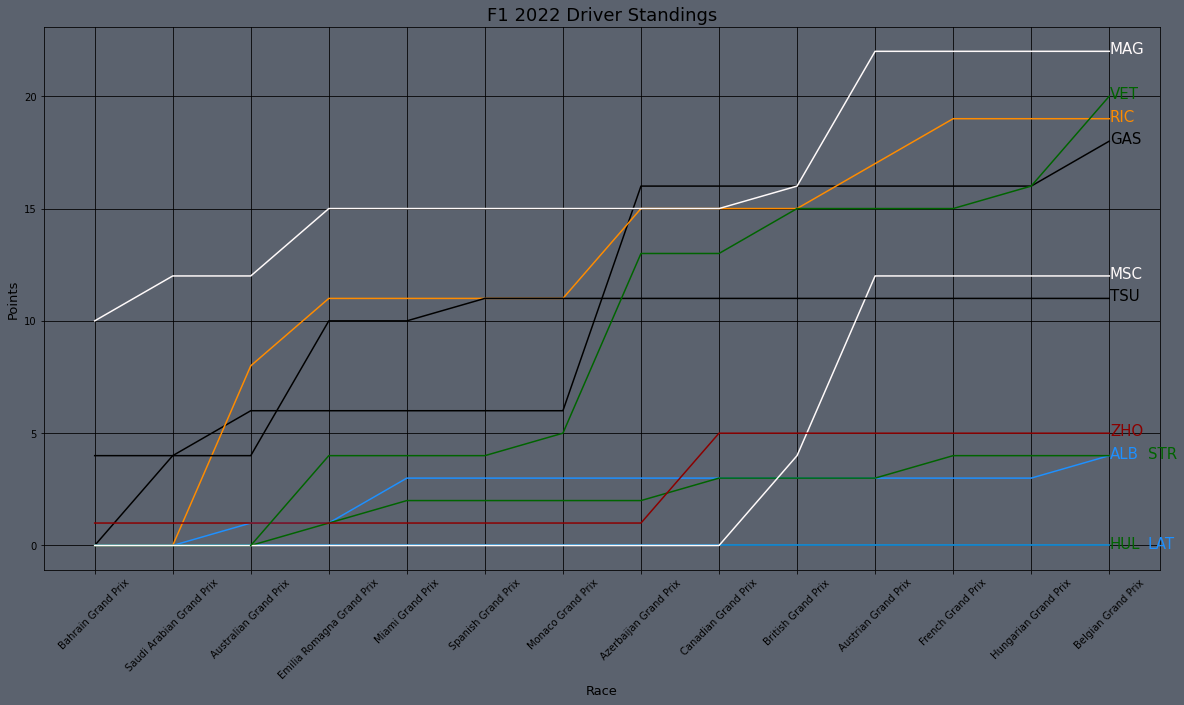

In [59]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkgreen', 'dodgerblue','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','black','snow','darkgreen']

ax = sns.lineplot(driver_standings2['Race Name'], driver_standings2['points'],palette=colors,hue=driver_standings2['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)




x = 0
for line, name in zip(ax.lines, driver_standings2['Name']):
    if name=='MAG' and x >9:
        name='VET'

    y = line.get_ydata()[-1]
    if name == 'LAT':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name == 'STR':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name != 'LAT' and name != 'STR':
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")

    x+=1
    if x >= 11:
        break

plt.legend().set_visible(False)
plt.grid(color ='black')
plt.show()